In [89]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
#torch.set_default_dtype(torch.double)

# Parameters
Two,Ttrain = 5000,100000
N = 100
C = 0.98
dim = 10
N_d = int(N * dim)
maxtau = int(N_d * 1.2)

torch.manual_seed(0)
#u_asym = torch.rand(dim, Two + Ttrain)
#u_asym = torch.normal(0,0.1,(dim, Two + Ttrain))
#u_sym = 2 * u_asym - 1
#
u_sym = torch.normal(0,1,size = (dim, Two + Ttrain)).to("cuda:0")

#
randomizer = torch.arange(1,dim+1)
#randomizer = torch.rand(dim)*dim + 1
#randomizer = torch.sort(randomizer)[0]

for i in range(dim):
    u_sym[i] = u_sym[i]*torch.sqrt(randomizer[i])
    """
    if i % 2 == 0:
        u_sym[i] = torch.normal(0,torch.sqrt(randomizer[i]/3),size =(Two + Ttrain,))
    """
    
esn = ESN.ESN_mult(N_d, uC=C, dim=dim,idWin = True)
Xwo = esn.run_washout(u_sym, Two, actf="identity")
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=50)
mfs, sur_val = ESN.MC_cSVD_old(u_sym, Xwo, maxtau,rep_sur=True)

totMC = torch.sum(mfs)




IndexError: list index out of range

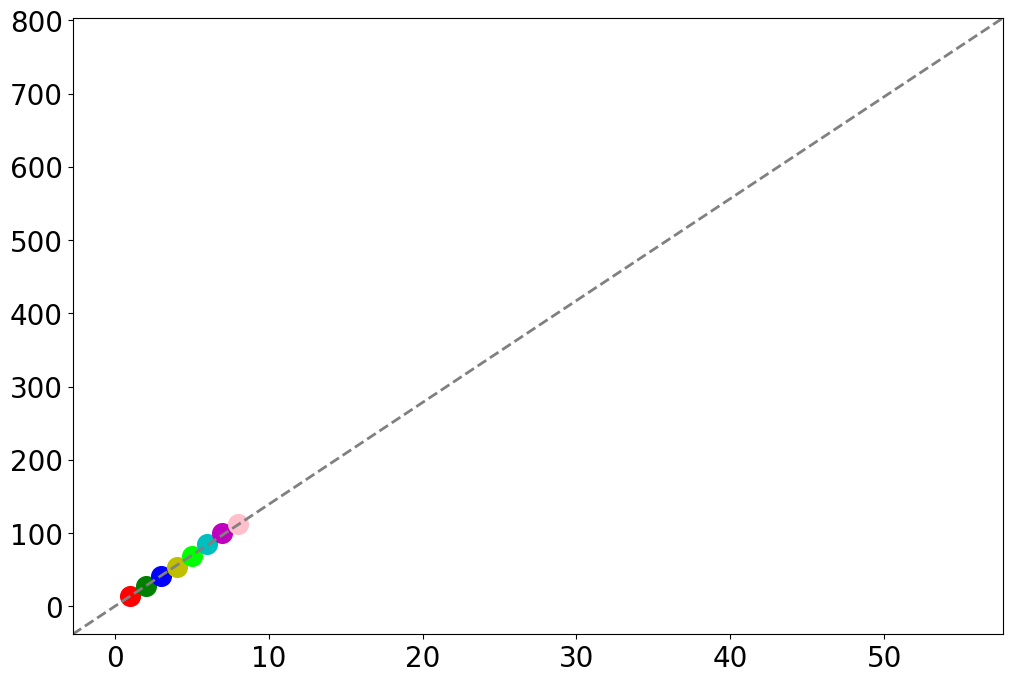

In [91]:

colors = ["r", "g", "b", "y","lime" , "c", "m", "pink"]
vars = torch.var(u_sym,dim = 1).cpu().numpy()
MCs = torch.sum(mfs[:,],dim=1).cpu().numpy()
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(figsize=(12,8))
plt.axline((0,0),(np.sum(vars),np.sum(MCs)),c="grey",linestyle="--",linewidth = 2)
#plt.plot(vars,MCs,"bo--")

labels = ["k="+str(d+1) for d in range(dim)]
for d in range(dim):
    plt.scatter(vars[d],MCs[d],s=200,c=colors[d],label=labels[d])
    #plt.scatter(vars[d],MCs[d],s=200,label=labels[d])
    
plt.legend()
    
plt.grid(True)
plt.xlim(0,np.max(vars)*1.05)
plt.ylim(0,np.max(MCs)*1.05)
#plt.xlabel(r"$\sigma^2 (u_{k}(t))$")
#plt.ylabel(r"$MC^(k)$")
print(vars)
print(MCs)

In [ ]:
# plot forgetting curve
#maxtau = 1300
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'lines.linewidth': 4})

fig,ax = plt.subplots(figsize=(12,8))
taus = np.arange(1,maxtau)
dim = 5
for dim in range(dim):
    plt.plot(taus,mfs[dim][:taus.shape[0]].cpu().numpy(),alpha=0.8,color=colors[dim], label="k="+str(dim+1))
plt.xlim(1,taus.shape[0])

#plt.ylim(-0.1,1.1)
#plt.ylim(0,0.2)

#plt.xlabel("delay")
#plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
#plt.title(r'$N=%d, C=%.2f, totalMC=%.1f$'%(N_d,C,totMC))
plt.legend()
plt.grid(True)
plt.show()